<a href="https://colab.research.google.com/github/Nikhil-S15/RNN-Practice/blob/main/RNN_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**RNN**
---

program to predict the nationality/language given a person's name

In [ ]:
from io import open
import os, string, random, time, math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
from IPython.display import clear_output

In [ ]:
languages = []
data = []
X = []
y = []

# Open the file 'name2lang.txt' for reading
with open('name2lang.txt', 'r') as f:
    # Iterate over each line in the file
    for line in f:
        # Split each line by comma to separate name and language
        line = line.split(',')
        # Extract name and language, and remove leading/trailing whitespace
        name = line[0].strip()
        lang = line[1].strip()
        # If the language is not already in the list, add it
        if not lang in languages:
            languages.append(lang)
        # Append name to X and language to y
        X.append(name)
        y.append(lang)
        # Append (name, language) tuple to data list
        data.append((name, lang))

# Calculate the number of unique languages
n_languages = len(languages)

In [ ]:
print(languages)

['Portuguese', 'Irish', 'Spanish', 'Vietnamese', 'Chinese', 'Greek', 'Czech', 'Dutch', 'Japanese', 'French', 'German', 'Scottish', 'English', 'Russian', 'Polish', 'Arabic', 'Korean', 'Italian']


In [ ]:
print(data[0:10])

[('Abreu', 'Portuguese'), ('Albuquerque', 'Portuguese'), ('Almeida', 'Portuguese'), ('Alves', 'Portuguese'), ('Araujo', 'Portuguese'), ('Araullo', 'Portuguese'), ('Barros', 'Portuguese'), ('Basurto', 'Portuguese'), ('Belo', 'Portuguese'), ('Cabral', 'Portuguese')]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)# Split data into training and testing

In [ ]:
print(X_train)

['Abashkin', 'Gulimov', 'Tzelobenok', 'Funnell', 'Zhui', 'Jukes', 'Togunov', 'Sabbag', 'Kartomyshev', 'Makhnenko', 'Sokolsky', 'Masuno', 'Varela', 'Moffat', 'Bonner', 'Berezovsky', 'Helkvist', 'Thurston', 'Tovstuha', 'Millar', 'Tulintsev', 'Furey', 'Isaenko', 'Kalachev', 'Takecare', 'Newcombe', 'Taku', 'Artibyakin', 'Saifulov', 'Morcos', 'Jagodnikov', 'Halifman', 'Bagaryakoff', 'Pavluhin', 'Mari', 'Awramchik', 'Agaltsov', 'Fisichev', 'Shizuma', 'Yankin', 'Luts', 'Toshitala', 'Germain', 'Botros', 'Poulter', 'Lischenko', 'Porter', 'Melendez', 'Ibu', 'Carr', 'Ursler', 'Aderikhin', 'Gimondi', 'Rzhevsky', 'Slater', 'Atkin', 'Yagafarov', 'Huraskin', 'Underhill', 'Pylin', 'Yuschenko', 'Ardovini', 'Tunison', 'Dobrovolsky', 'Bezyzvestnyh', 'Roussel', 'Balakshin', 'Trumbauer', 'Vallance', 'Boerio', 'Waugh', 'Baz', 'Reading', 'Komon', 'Ireson', 'Venables', 'Tikhotsky', 'Spada', 'Winfield', 'Mikhnov', 'Lubsky', 'Antar', 'Sheehan', 'Tuma', 'Yuzefovich', 'Yamburg', 'Yukhvidov', 'Mikhail', 'Chi', 'De

In [ ]:
print(len(X_train), len(X_test))

16040 4010



**Encoding names and language**
---



In [ ]:
import string  # Import the string module to access ASCII letters

# Define a string containing all ASCII letters and common punctuation
all_letters = string.ascii_letters + " .,;'"

# Calculate the total number of characters in the string
n_letters = len(all_letters)


In [ ]:
def name_rep(name):
    # Initialize a tensor filled with zeros of shape (len(name), 1, n_letters)
    rep = torch.zeros(len(name), 1, n_letters)

    # Iterate over each character in the name along with its index
    for index, letter in enumerate(name):
        # Find the position of the letter in the string 'all_letters'
        pos = all_letters.find(letter)
        # Set the corresponding position in the tensor to 1
        rep[index][0][pos] = 1

    return rep

In [ ]:
def lang_rep(lang):
    return torch.tensor([languages.index(lang)], dtype=torch.long)

In [ ]:
name_rep('Abreu')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [ ]:
lang_rep('Portuguese')

tensor([0])

In [ ]:
# Initialize an empty dictionary to store counts for each language
count = {}

# Initialize counts for each language to zero
for l in languages:
    count[l] = 0

# Iterate through each data point and update the count for its associated language
for d in data:
    count[d[1]] += 1


In [ ]:
print(count)

{'Portuguese': 74, 'Irish': 232, 'Spanish': 298, 'Vietnamese': 73, 'Chinese': 268, 'Greek': 203, 'Czech': 519, 'Dutch': 297, 'Japanese': 991, 'French': 277, 'German': 724, 'Scottish': 100, 'English': 3668, 'Russian': 9384, 'Polish': 139, 'Arabic': 2000, 'Korean': 94, 'Italian': 709}


<ipython-input-18-1a2b47379987>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)


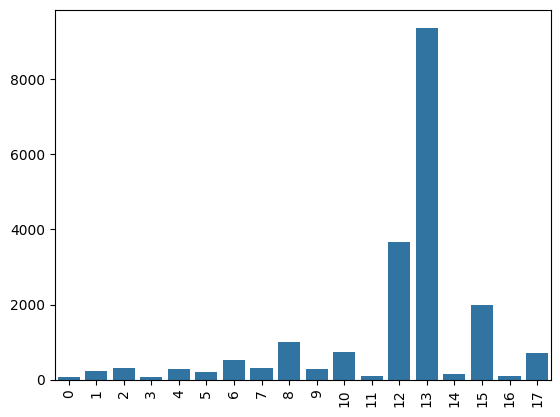

In [ ]:
# Create a bar plot using seaborn with the values from count dictionary
plt_ = sns.barplot(x=list(count.values()), y=list(count.keys()))  # Setting x as values and y as keys
# Rotate the x-axis labels by 90 degrees for better readability
plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)
# Display the plot
plt.show()

In [ ]:
class RNN_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN_net, self).__init__()
        # Define the size of the hidden state
        self.hidden_size = hidden_size
        # Define a linear layer mapping input and hidden state to hidden state
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        # Define a linear layer mapping input and hidden state to output
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        # Define the softmax function to normalize output probabilities
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_, hidden):
        # Concatenate input and hidden state tensors along dimension 1
        combined = torch.cat((input_, hidden), 1)
        # Compute the new hidden state using the input and previous hidden state
        hidden = self.i2h(combined)
        # Compute the output using the input and previous hidden state
        output = self.i2o(combined)
        # Apply softmax to the output to get normalized probabilities
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self):
        # Initialize the hidden state with zeros
        return torch.zeros(1, self.hidden_size)


In [ ]:
# Define the size of the hidden layer
n_hidden = 128

# Create an instance of the RNN_net class with the specified input, hidden, and output sizes
net = RNN_net(n_letters, n_hidden, n_languages)


In [ ]:
def infer(net, name):
    # Set the network to evaluation mode
    net.eval()
    # Convert the input name to its one-hot encoding representation
    name_ohe = name_rep(name)
    # Initialize the hidden state of the network
    hidden = net.init_hidden()

    # Iterate over each character in the name
    for i in range(name_ohe.size()[0]):
        # Forward pass through the network to get output and update hidden state
        output, hidden = net(name_ohe[i], hidden)

    # Return the final output (probability distribution over languages)
    return output


In [ ]:
# Get the output probabilities for the name 'Adam' using the trained network
output = infer(net, 'Adam')

# Find the index of the language with the highest probability
index = torch.argmax(output)

# Print the output probabilities and the index of the predicted language
print(output, index)


tensor([[-2.9125, -2.7642, -2.8791, -3.0521, -2.8490, -3.0060, -2.8972, -2.9049,
         -2.8945, -2.8602, -2.9838, -2.9272, -2.8046, -2.8664, -2.9473, -2.7690,
         -2.9019, -2.8546]], grad_fn=<LogSoftmaxBackward0>) tensor(1)


In [ ]:
def dataloader(npoints, X_, y_):
    # Initialize an empty list to store the data points
    to_ret = []

    # Iterate over the specified number of data points
    for i in range(npoints):
        # Randomly select an index from the dataset
        index_ = np.random.randint(len(X_))
        # Retrieve the name and language corresponding to the selected index
        name, lang = X_[index_], y_[index_]
        # Convert the name to its one-hot encoding representation
        name_rep = name_rep(name)
        # Convert the language to its one-hot encoding representation
        lang_rep = lang_rep(lang)
        # Append a tuple containing the name, language, name representation, and language representation to the list
        to_ret.append((name, lang, name_rep, lang_rep))

    # Return the list of data points
    return to_ret


In [ ]:
dataloader(2, X_train, y_train)

[('Wong',
  'English',
  tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
def eval(net, n_points, k, X_, y_):
    # Generate random data points using the dataloader function
    data_ = dataloader(n_points, X_, y_)
    # Initialize a variable to count the number of correct predictions
    correct = 0

    # Iterate over each data point
    for name, language, name_ohe, lang_rep in data_:
        # Infer the language of the name using the neural network
        output = infer(net, name)
        # Get the top k predictions and their indices
        val, indices = output.topk(k)

        # Check if the true language representation is among the top k predictions
        if lang_rep in indices:
            correct += 1

    # Calculate the accuracy by dividing the number of correct predictions by the total number of data points
    accuracy = correct / n_points
    return accuracy


In [ ]:
eval(net, 1000, 3, X_test, y_test)

0.512

In [ ]:
def train(net, opt, criterion, n_points):
    # Zero the gradients in the optimizer
    opt.zero_grad()
    # Initialize a variable to store the total loss
    total_loss = 0

    # Generate random training data points using the dataloader function
    data_ = dataloader(n_points, X_train, y_train)

    # Iterate over each training data point
    for name, language, name_ohe, lang_rep in data_:
        # Initialize the hidden state of the network
        hidden = net.init_hidden()

        # Iterate over each character in the name
        for i in range(name_ohe.size()[0]):
            # Forward pass through the network to get output and update hidden state
            output, hidden = net(name_ohe[i], hidden)

        # Compute the loss between the network output and the true language representation
        loss = criterion(output, lang_rep)
        # Backpropagate the gradients
        loss.backward(retain_graph=True)

        # Accumulate the loss for this data point
        total_loss += loss

    # Update the network parameters using the optimizer
    opt.step()

    # Return the average loss per data point
    return total_loss / n_points


In [ ]:
criterion = nn.NLLLoss()
opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [ ]:
%%time
train(net, opt, criterion, 200)

CPU times: user 424 ms, sys: 64.5 ms, total: 489 ms
Wall time: 557 ms


tensor(2.8352, grad_fn=<DivBackward0>)

In [ ]:
eval(net, 1000, 1, X_test, y_test)

0.482

In [ ]:
def train_setup(net, lr=0.01, n_batches=100, batch_size=10, momentum=0.9, display_freq=5):
    # Define the loss criterion
    criterion = nn.NLLLoss()
    # Define the optimizer with stochastic gradient descent (SGD) and specified learning rate and momentum
    opt = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

    # Initialize an array to store the loss values
    loss_arr = np.zeros(n_batches + 1)

    # Iterate over the specified number of batches
    for i in range(n_batches):
        # Compute the average loss for the current batch and update the loss array
        loss_arr[i + 1] = (loss_arr[i] * i + train(net, opt, criterion, batch_size)) / (i + 1)

        # Display progress and loss information at specified frequency
        if i % display_freq == display_freq - 1:
            clear_output(wait=True)

            # Print evaluation metrics (top-1 and top-2 accuracy) and current loss
            print('Iteration', i, 'Top-1:', eval(net, len(X_test), 1, X_test, y_test), 'Top-2:', eval(net, len(X_test), 2, X_test, y_test), 'Loss', loss_arr[i])

            # Plot the loss curve
            plt.figure()
            plt.plot(loss_arr[1:i], '-*')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.show()

            print('\n\n')


Iteration 99 Top-1: 0.641645885286783 Top-2: 0.7698254364089776 Loss 1.4763087034225464


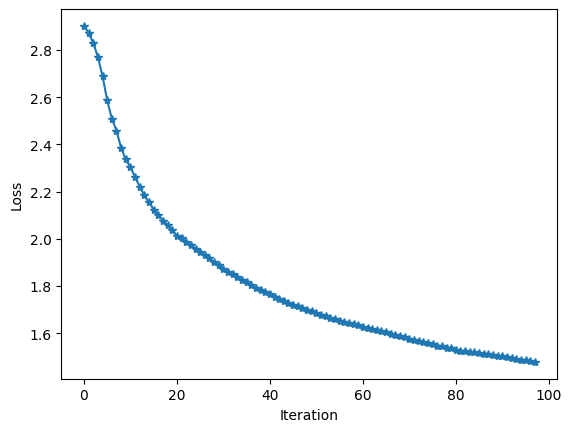

In [ ]:
n_hidden = 128
net = RNN_net(n_letters, n_hidden, n_languages)
train_setup(net, lr=0.0005, n_batches=100, batch_size = 256)


**LSTM**
---



In [ ]:
class LSTM_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM_net, self).__init__()
        # Initialize the hidden size
        self.hidden_size = hidden_size
        # Define the LSTM cell with input size and hidden size
        self.lstm_cell = nn.LSTM(input_size, hidden_size)
        # Map the hidden state to output size
        self.h2o = nn.Linear(hidden_size, output_size)
        # Apply softmax to get the output probabilities
        self.softmax = nn.LogSoftmax(dim=2)

    def forward(self, input_, hidden):
        # Forward pass through the LSTM cell
        out, hidden = self.lstm_cell(input_.view(1, 1, -1), hidden)
        # Map the hidden state to output size
        output = self.h2o(hidden[0])
        # Apply softmax to get the output probabilities
        output = self.softmax(output)
        # Reshape the output to match the expected shape
        return output.view(1, -1), hidden

    def init_hidden(self):
        # Initialize the hidden state and cell state with zeros
        return (torch.zeros(1, 1, self.hidden_size), torch.zeros(1, 1, self.hidden_size))


Iteration 99 Top-1: 0.5406483790523691 Top-2: 0.68428927680798 Loss 1.8069411516189575


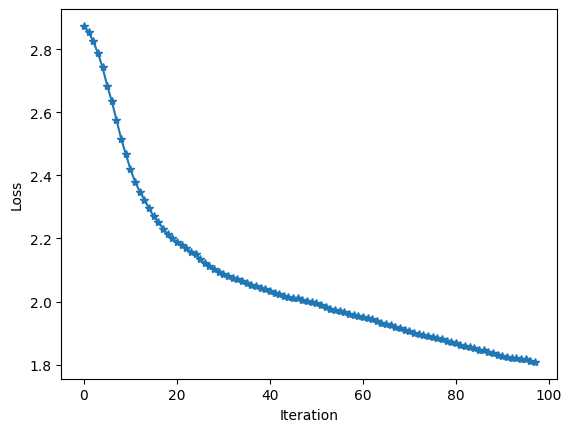

In [ ]:
n_hidden = 128
net = LSTM_net(n_letters, n_hidden, n_languages)
train_setup(net, lr=0.0005, n_batches=100, batch_size = 256)


**GRU CELL**
---



In [ ]:
class GRU_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU_net, self).__init__()
        # Initialize the hidden size
        self.hidden_size = hidden_size
        # Define the GRU cell with input size and hidden size
        self.gru_cell = nn.GRU(input_size, hidden_size)
        # Map the hidden state to output size
        self.h2o = nn.Linear(hidden_size, output_size)
        # Apply softmax to get the output probabilities
        self.softmax = nn.LogSoftmax(dim=2)

    def forward(self, input_, hidden):
        # Forward pass through the GRU cell
        out, hidden = self.gru_cell(input_.view(1, 1, -1), hidden)
        # Map the hidden state to output size
        output = self.h2o(hidden)
        # Apply softmax to get the output probabilities
        output = self.softmax(output)
        # Reshape the output to match the expected shape
        return output.view(1, -1), hidden

    def init_hidden(self):
        # Initialize the hidden state with zeros
        return torch.zeros(1, 1, self.hidden_size)


Iteration 99 Top-1: 0.6084788029925187 Top-2: 0.730423940149626 Loss 1.627581000328064


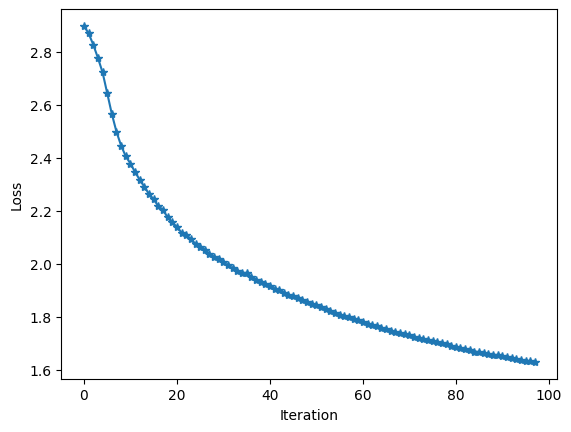

In [ ]:
n_hidden = 128
net = GRU_net(n_letters, n_hidden, n_languages)
train_setup(net, lr=0.0005, n_batches=100, batch_size = 256)